In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('currency.jpg')

print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

Image Properties
- Number of Pixels: 108900
- Shape/Dimensions: (121, 300, 3)


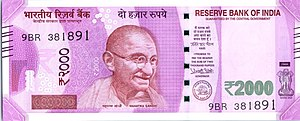

In [ ]:

cv2_imshow(img)

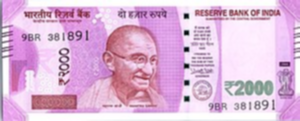

In [ ]:
#Blurring image 
import numpy as np
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
image_blur = cv2.filter2D(src=img, ddepth=-1, kernel=gaussian)
cv2_imshow(image_blur)


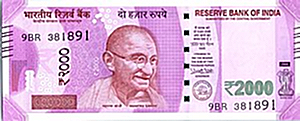

True

In [ ]:
#sharpening image
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=image_blur, ddepth=-1, kernel=kernel)
cv2_imshow(image_sharp)
cv2.imwrite('sharp.jpg',image_blur)

ADDING NOISE 

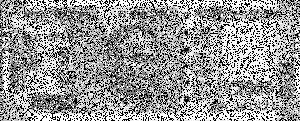

In [ ]:
import random
import cv2
 
def add_noise(img):
 
    # Getting the dimensions of the image
    row  = img.shape[0]
    col = img.shape[1]
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img
 
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('sharp.jpg',
                 cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('salt-and-pepper-currency.jpg',
            add_noise(img))
cv2_imshow(add_noise(img))

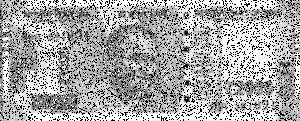

True

In [ ]:
import cv2
import os 
import sys 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

img = cv2.imread('salt-and-pepper-currency.jpg')
#cv2_imshow(img)
height, width = img.shape[:2]
max_height =400
max_width = 400

# only shrink if img is bigger than required
if max_height < height or max_width < width:
    # get scaling factor
    scaling_factor = max_height / float(height)
    if max_width/float(width) < scaling_factor:
        scaling_factor = max_width / float(width)
    # resize image
    img = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
    

print("\n")
cv2_imshow(img)
cv2.imwrite('sample1.jpg', img)

GRAY SCALE IMAGE

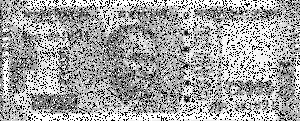

In [ ]:
# Convert image to grayscale
gray_image = cv2.imread('sample1.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite("gray.jpg",gray_image)
cv2_imshow(gray_image)

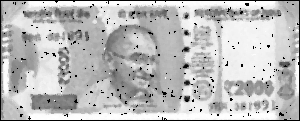

In [ ]:
import cv2
import numpy as np


# Read the image
img_noisy1 = cv2.imread('salt-and-pepper-currency.jpg', 0)

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

median = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)
cv2_imshow(img_new1)

Brightness adjustment

In [ ]:
import numpy as np
def manip_image(image, alpha, beta):
  
  new_image = np.zeros(median.shape, image.dtype)
  
  
  for y in range(median.shape[0]):
    for x in range(median.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
  
  return new_image 

  

(None,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

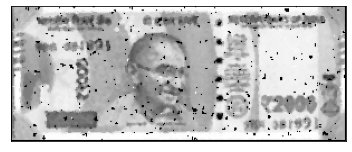

In [ ]:
img_dark = manip_image(median, 1, -25)

# Compare the results
plt.figure()

plt.imshow(img_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

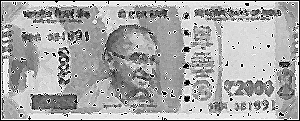

In [ ]:
#sharpening image
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img_dark, ddepth=-1, kernel=kernel)
cv2_imshow(image_sharp)


CONTRAST ENHANCEMENT

(None,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

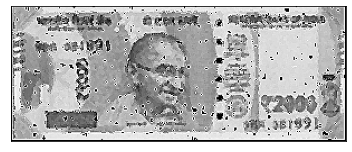

In [ ]:
# Test on the image
increase_contrast = manip_image(image_sharp, 1, 0)


# Compare the results

plt.figure()


plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

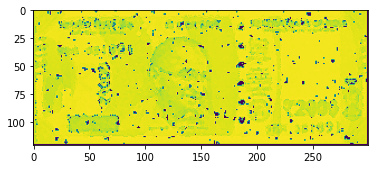

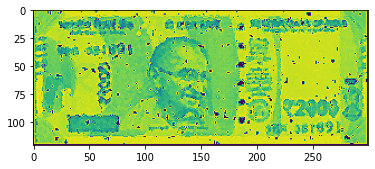

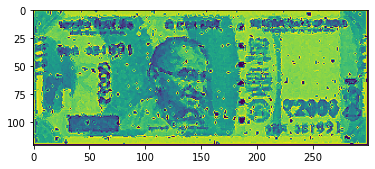

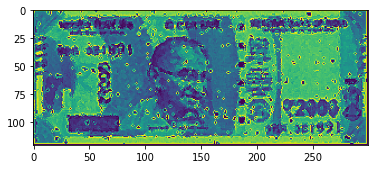

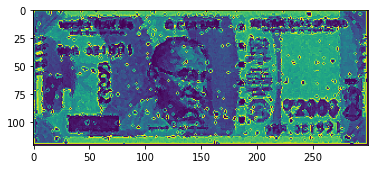

In [ ]:

import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np 
#this type of processing is suited for displaying image correctly for human eye based on monitor's display settings

# Read an image 
#image = cv2.imread('gray.jpg') 
'''plt.imshow(image) 
plt.show()'''
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2, 3.2]: 

    # Apply gamma correction. 
    gamma_corrected = np.array(255*(increase_contrast/ 255) ** gamma, dtype = 'uint8') 
    plt.imshow(gamma_corrected) 
    plt.show()

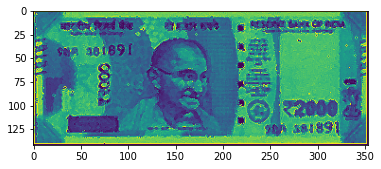

In [ ]:
g=2.2
gamma_corrected = np.array(255*(increase_contrast / 255) ** g, dtype = 'uint8') 
plt.imshow(gamma_corrected)
cv2.imwrite("gamma.jpg",gamma_corrected) 

plt.show()


HISTOGRAM

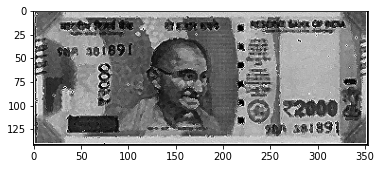

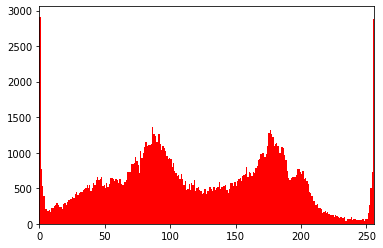

In [ ]:
## code to plot histogram in pythonimport numpy as np
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np


img = cv2.imread('gamma.jpg')

# Display the images
plt.imshow(img) 
plt.show()

#display the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [ ]:
def histogram_equalization(img_in):

# segregate color streams
    b,g,r = cv2.split(img_in)
    
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
    
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
    
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
    
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

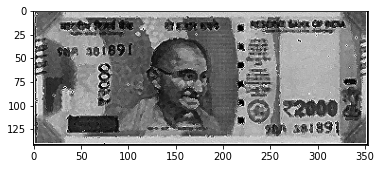

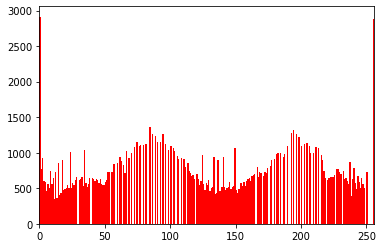

In [ ]:
img_out = histogram_equalization(img)
cv2.imwrite("hist.jpg",img_out)
# Display the images
plt.imshow(img) 
plt.show()

#display the histogram
hist,bins = np.histogram(img_out.flatten(),256,[0,256])
plt.hist(img_out.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np
# Read the image in greyscale
img = cv2.imread('hist.jpg',0)

#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits

# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])

# Vertically concatenate
final = cv2.hconcat([finalr,finalv])


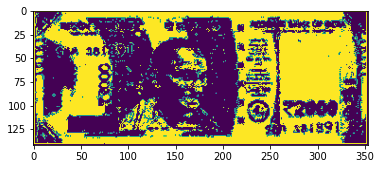

True

In [ ]:
# Display the images
plt.imshow(eight_bit_img) 
plt.show()
cv2.imwrite('eight.jpg',eight_bit_img)

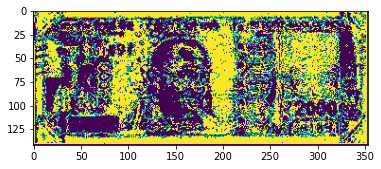

In [ ]:
# Display the images
plt.imshow(seven_bit_img) 
plt.show()

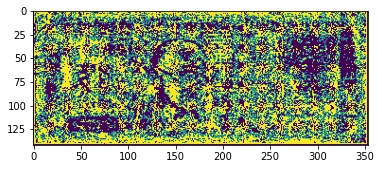

In [ ]:
# Display the images
plt.imshow(six_bit_img) 
plt.show()

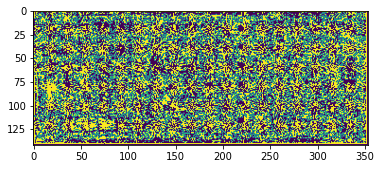

In [ ]:
# Display the images
plt.imshow(five_bit_img) 
plt.show()

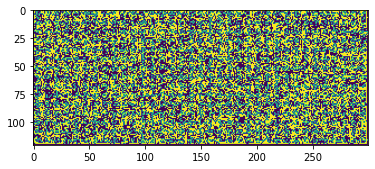

In [ ]:
# Display the images
plt.imshow(four_bit_img) 
plt.show()

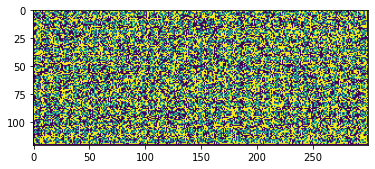

In [ ]:
# Display the images
plt.imshow(three_bit_img) 
plt.show()

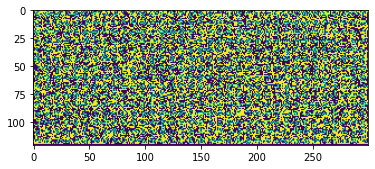

In [ ]:
# Display the images
plt.imshow(two_bit_img) 
plt.show()

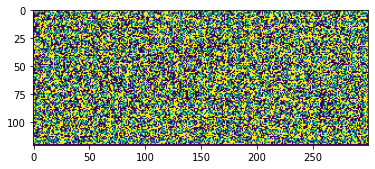

In [ ]:
# Display the images
plt.imshow(one_bit_img) 
plt.show()

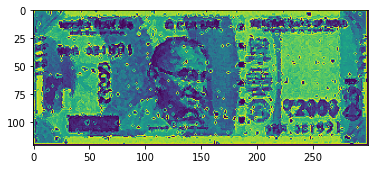

In [ ]:
# Combining 4 bit planes
new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img+four_bit_img
# Display the images
plt.imshow(new_img) 
plt.show()